In [1]:
# importando os dados
import pandas as pd

path = r'/home/lapisco/Desktop/ica/ICA/Dados/datasets/artificial/federal_institute/data.csv'
data = pd.read_csv(path)

data = pd.DataFrame(data)
data

,99,129,2
0,261,148,1
1,58,274,1
2,219,91,1
3,143,254,2
4,58,141,1
...,...,...,...
9994,279,216,1
9995,149,313,1
9996,28,96,1
9997,301,277,1


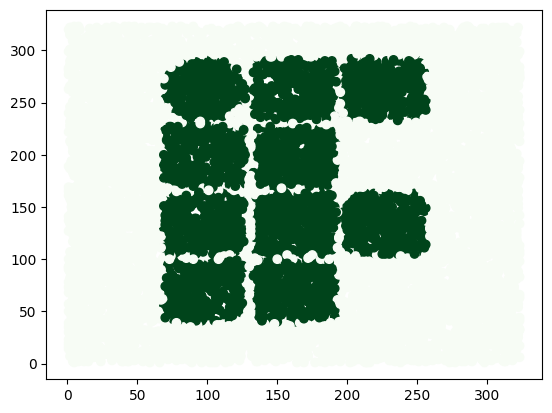

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x = data['99'], y = data['129'], c=data['2'], cmap = 'Greens')

In [7]:
# Pré-processamento
#   Normalizando os dados

from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
normalizador.fit(data)

dados_normalizados = pd.DataFrame(normalizador.transform(data), columns = data.columns)
dados_normalizados.head()

X = dados_normalizados.drop(columns='2')
y = dados_normalizados['2']

XB = data.drop(columns='2')
yB = data['2']

In [8]:
# Separando os dados para o treinamento

from sklearn.model_selection import train_test_split

X_trainB, X_testB, y_trainB, y_testB = train_test_split(XB, yB, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Para mostrar as metricas

def metricas(matriz_confusao):
    VP, FN = matriz_confusao[0]
    FP, VN = matriz_confusao[1]
    sensibilidade = VP/(VP+FN)
    especificidade =VN/(FP+VN)
    acuracia = (VP + VN)/(VP+FN+FP+VN)
    return [sensibilidade, especificidade, acuracia]
    

In [10]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, solver='adam')
mlp.fit(X_train, y_train)
predi = mlp.predict(X_test)


mlpB = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, solver='adam')
mlpB.fit(X_trainB, y_trainB)
prediB = mlpB.predict(X_testB)

# Matriz de confusão para calcular as métricas
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predi)

array([[1274,   82],
       [  20,  624]])

In [11]:
confusion_matrix(y_testB, prediB)

array([[1282,   74],
       [ 308,  336]])

In [12]:
metrics = metricas(confusion_matrix(y_test, predi))
metricsB = metricas(confusion_matrix(y_testB, prediB))

print('MLP COM DADOS PRÉ-PROCESSADOS')
print('-'*20)
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}', '\n')

print('MLP COM DADOS BRUTOS')
print('-'*20)
print(f'SENSIBILIDADE: {metricsB[0]}; ESPECIFICIDADE: {metricsB[1]};  ACURÁCIA: {metricsB[2]}')


MLP COM DADOS PRÉ-PROCESSADOS
--------------------
SENSIBILIDADE: 0.93952802359882; ESPECIFICIDADE: 0.968944099378882;  ACURÁCIA: 0.949 

MLP COM DADOS BRUTOS
--------------------
SENSIBILIDADE: 0.9454277286135693; ESPECIFICIDADE: 0.5217391304347826;  ACURÁCIA: 0.809


In [13]:
from sklearn.naive_bayes import GaussianNB

naiveBayesGaussian = GaussianNB()
naiveBayesGaussian.fit(X_train, y_train)
prediNB = naiveBayesGaussian.predict(X_test)

naiveBayesGaussianB = GaussianNB()
naiveBayesGaussianB.fit(X_trainB, y_trainB)
prediNBB = naiveBayesGaussianB.predict(X_testB)

print(confusion_matrix(prediNB, y_test))

[[1298  386]
 [  58  258]]


In [14]:
print(confusion_matrix(prediNBB, y_testB))

[[1298  386]
 [  58  258]]


In [15]:
metrics = metricas(confusion_matrix(y_test, prediNB))
metricsB = metricas(confusion_matrix(y_testB, prediNBB))

print('NAIVE BAYES COM DADOS PRÉ-PROCESSADOS')
print('-'*20)
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}', '\n')

print('NAIVE BAYES COM DADOS BRUTOS')
print('-'*20)
print(f'SENSIBILIDADE: {metricsB[0]}; ESPECIFICIDADE: {metricsB[1]};  ACURÁCIA: {metricsB[2]}')

NAIVE BAYES COM DADOS PRÉ-PROCESSADOS
--------------------
SENSIBILIDADE: 0.9572271386430679; ESPECIFICIDADE: 0.40062111801242234;  ACURÁCIA: 0.778 

NAIVE BAYES COM DADOS BRUTOS
--------------------
SENSIBILIDADE: 0.9572271386430679; ESPECIFICIDADE: 0.40062111801242234;  ACURÁCIA: 0.778


In [16]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf',C=5, gamma=0.1)

svc.fit(X_train, y_train)
prediSVC = svc.predict(X_test)



svcB = SVC(kernel='rbf',C=5, gamma=0.1)

svcB.fit(X_trainB, y_trainB)
prediSVCB = svcB.predict(X_testB)


print(confusion_matrix(prediSVC, y_test))

[[1182  162]
 [ 174  482]]


In [17]:
print(confusion_matrix(prediSVCB, y_testB))

[[1338   29]
 [  18  615]]


In [18]:
metrics = metricas(confusion_matrix(y_test, prediSVC))
metricsB = metricas(confusion_matrix(y_testB, prediSVCB))

print('SVM RBF COM DADOS PRÉ-PROCESSADOS')
print('-'*20)
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}', '\n')

print('SVM RBF COM DADOS BRUTOS')
print('-'*20)
print(f'SENSIBILIDADE: {metricsB[0]}; ESPECIFICIDADE: {metricsB[1]};  ACURÁCIA: {metricsB[2]}')

SVM RBF COM DADOS PRÉ-PROCESSADOS
--------------------
SENSIBILIDADE: 0.8716814159292036; ESPECIFICIDADE: 0.7484472049689441;  ACURÁCIA: 0.832 

SVM RBF COM DADOS BRUTOS
--------------------
SENSIBILIDADE: 0.9867256637168141; ESPECIFICIDADE: 0.9549689440993789;  ACURÁCIA: 0.9765


In [19]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc_pol = SVC(kernel='poly', C=5, gamma=2, degree=0)


svc_pol.fit(X_train, y_train)
prediSVC_poli = svc_pol.predict(X_test)

print(confusion_matrix(prediSVC_poli, y_test))



[[1356  644]
 [   0    0]]


In [20]:
svc_polB = SVC(kernel='poly', C=5, gamma=2, degree=0)


svc_polB.fit(X_trainB, y_trainB)
prediSVC_poliB = svc_polB.predict(X_testB)


print(confusion_matrix(prediSVC_poliB, y_testB))

[[1356  644]
 [   0    0]]


In [21]:
metrics = metricas(confusion_matrix(y_test, prediSVC_poli))
metricsB = metricas(confusion_matrix(y_testB, prediSVC_poliB))

print('SVM RBF COM DADOS PRÉ-PROCESSADOS')
print('-'*20)
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}', '\n')

print('SVM RBF COM DADOS BRUTOS')
print('-'*20)
print(f'SENSIBILIDADE: {metricsB[0]}; ESPECIFICIDADE: {metricsB[1]};  ACURÁCIA: {metricsB[2]}')

SVM RBF COM DADOS PRÉ-PROCESSADOS
--------------------
SENSIBILIDADE: 1.0; ESPECIFICIDADE: 0.0;  ACURÁCIA: 0.678 

SVM RBF COM DADOS BRUTOS
--------------------
SENSIBILIDADE: 1.0; ESPECIFICIDADE: 0.0;  ACURÁCIA: 0.678


In [22]:
from sklearn.svm import SVC

svc_lin = SVC(kernel='linear', C=9, gamma=5, degree=4)


svc_lin.fit(X_train, y_train)
prediSVC_lin = svc_lin.predict(X_test)

print(confusion_matrix(prediSVC_lin, y_test))

[[1356  644]
 [   0    0]]


In [23]:
metrics = metricas(confusion_matrix(prediSVC_lin, y_test))
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}')

SENSIBILIDADE: 0.678; ESPECIFICIDADE: nan;  ACURÁCIA: 0.678


/tmp/ipykernel_6200/662972416.py:7: RuntimeWarning: invalid value encountered in scalar divide
  especificidade =VN/(FP+VN)
